## **Instrucciones**
* Antes de iniciar debe hacer una copia del notebook (Archivo > Guardar una copia en Drive)
* Debe completar el codigo faltante donde se marca "# TU CODIGO AQUI". Al agregar el código borra "# TU CODIGO AQUI".
* Una vez finalizada la tarea debe descargar el notebook (Archivo > Descargar > Descargar .ipynb) y enviar el archivo con los nombres de los integrantes del equipo a fernandosilva.clases@gmail.com hasta máximo el domingo 13 de Abril a horas 23:59 hora Bolivia.
* Solo debe enviar la tarea un integrante del equipo.



### Nombres integrantes:
* José Gutierrez
* Horacio Molina



---



## Descripción de la Tarea:

En esta tarea, se busca comparar los algoritmos LQV (Learning Vector Quantization) y K-Means en términos de su capacidad para agrupar datos del conjunto de datos Breast Cancer. Este dataset es conocido por su uso en la clasificación de tumores como malignos o benignos, y contiene características relacionadas con las propiedades físicas de las células.


## Objetivo:

El objetivo principal de la tarea es analizar y comparar el rendimiento de LQV y K-Means al agrupar los datos del conjunto Breast Cancer, determinando cuál de los dos algoritmos es más efectivo para este problema.


# PARTE A: LVQ aplicado al dataset Breast Cancer


### 1. Importamos las librerias necesarias

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### 2. Cargamos el dataset Breast Cancer

Pista: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [4]:
cancer = load_breast_cancer()

# Usamos las dos primeras características para visualización:
data = cancer.data[:, :2]

# Etiquetas de clase:
labels = cancer.target

# Número de clases:
n_classes = len(np.unique(labels))


### 3. Estandarizamos los datos para mejorar la convergencia

Pista: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [5]:
# Usamos StandardScaler
scaler = StandardScaler()

# Aplicamos el scaler en nuestra data
data = scaler.fit_transform(data)


### 4. Definimos parámetros iniciales

In [6]:
learning_rate = 0.01
n_iterations = 100


### 5. Inicializamos los prototipos

In [7]:
prototypes = np.array([data[labels == i][np.random.choice(len(data[labels == i]))] for i in range(n_classes)])


### 6. Implementación LVQ en Numpy


In [8]:
# Función de distancia euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Entrenamiento LVQ
for iteration in range(n_iterations):
    for i in range(len(data)):
        x = data[i]
        y = labels[i]
        distances = np.array([euclidean_distance(x, prototype) for prototype in prototypes])
        closest_prototype_idx = np.argmin(distances)
        if closest_prototype_idx == y:
            prototypes[closest_prototype_idx] += learning_rate * (x - prototypes[closest_prototype_idx])
        else:
            prototypes[closest_prototype_idx] -= learning_rate * (x - prototypes[closest_prototype_idx])

# Clasificación y evaluación
def classify(x, prototypes):
    distances = np.array([euclidean_distance(x, prototype) for prototype in prototypes])
    return np.argmin(distances)


### 7. Predicción

In [9]:
predictions = np.array([classify(x, prototypes) for x in data])
accuracy = np.mean(predictions == labels)
print(f"Precisión del modelo LVQ: {accuracy:.2f}")

Precisión del modelo LVQ: 0.87


### 8. Visualización

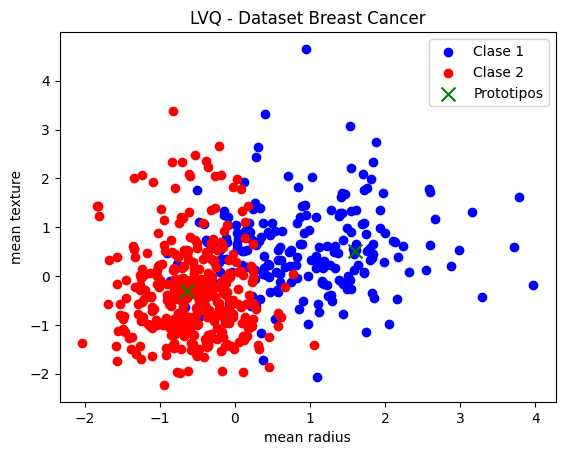

In [10]:
colors = ['blue', 'red']
for i in range(n_classes):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i], label=f'Clase {i+1}')
plt.scatter(prototypes[:, 0], prototypes[:, 1], color='green', marker='x', s=100, label='Prototipos')
plt.legend()
plt.title("LVQ - Dataset Breast Cancer")
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.show()



---



# PARTE B: KMeans aplicado al dataset Breast Cancer

### 9. Cargamos la libreria necesaria

Utilizaremos KMeans de Sklearn.

Pista: https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
#TU CODIGO AQUI

### 10. Cargamos el dataset Breast Cancer

In [ ]:
# Usamos todas las características
data = #TU CODIGO AQUI

# Etiquetas de clase
labels = #TU CODIGO AQUI

### 11. Estandarizamos los datos para mejorar la convergencia de KMeans

In [ ]:
# Realiza el mismo proceso de escalado que hiciste en la parte A
scaler = #TU CODIGO AQUI
data_scaled = #TU CODIGO AQUI

### 12. Aplicamos Silhouette Score para encontrar el numero K adecuado


In [ ]:
from sklearn.metrics import #TU CODIGO AQUI

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=#TU CODIGO AQUI, random_state=42)
    y_kmeans = kmeans.fit_predict(#TU CODIGO AQUI)

    if k > 1:  # El Silhouette Score no se define para k = 1
        silhouette_scores.append(#TU CODIGO AQUI(#TU CODIGO AQUI, #TU CODIGO AQUI))
    else:
        silhouette_scores.append(0)  # Ponemos 0 para k=1 por conveniencia


In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"El valor óptimo de k es: {best_k}")

### 13. Aplicamos KMeans

In [ ]:
kmeans = #TU CODIGO AQUI(n_clusters=n_classes, random_state=42)
kmeans.fit(#TU CODIGO AQUI)

### 14. Predicciones de KMeans

In [ ]:
predictions = kmeans.predict(#TU CODIGO AQUI)

### 15. Evaluación

In [ ]:
accuracy = np.mean(#TU CODIGO AQUI)
print(f"Precisión de KMeans: {accuracy:.2f}")

### 16. Visualización

In [ ]:
# Visualización (usando las dos primeras características para simplificación)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']

# Graficamos las clases reales
for i in range(n_classes):
    plt.scatter(data_scaled[labels == i, 0], data_scaled[labels == i, 1], color=colors[i], label=f'Clase {i} Real')

# Graficamos los clusters obtenidos por KMeans
for i in range(n_classes):
    plt.scatter(data_scaled[predictions == i, 0], data_scaled[predictions == i, 1], color=colors[i], marker='x', label=f'Cluster {i} Predicho')

plt.title("KMeans - Dataset Breast Cancer")
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend()
plt.show()

### 17. Interpretación de resultados

Respuesta: